In [1]:
import numpy as np
import pandas as pd
import os
import pdb
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

np.random.seed(97)

In [2]:
m = ["A", "C", "G", "T"]
def id2seq(ids):
    return "".join([m[i] for i in ids])

In [3]:
ensemble_predictions_dir = "/global/scratch/users/aniketh/promoter_modelling/jax_data/ensemble_predictions/"

In [4]:
os.listdir(ensemble_predictions_dir)

['dataset_seqs_eval_2.pkl',
 'all_ensemble_predictions.parquet',
 'dataset_seqs_eval.pkl',
 'coms_seqs_eval_2.pkl',
 'sequences_from_batch_1_expression_spectrum_eval_2.pkl',
 'coms_seqs_eval.pkl',
 'sequences_from_batch_1_expression_spectrum_eval.pkl',
 'den_seqs_eval_2.pkl',
 'den_seqs_eval.pkl',
 'sequences_generated_using_DE_motifs_eval.pkl',
 'sequences_generated_using_DE_motifs_eval_2.pkl']

In [5]:
dataset_sequences = pickle.load(open(os.path.join(ensemble_predictions_dir, "dataset_seqs_eval_2.pkl"), "rb"))
sequences_from_batch_1_expression_spectrum = pickle.load(open(os.path.join(ensemble_predictions_dir, "sequences_from_batch_1_expression_spectrum_eval_2.pkl"), "rb"))
sequences_generated_using_DE_motifs = pickle.load(open(os.path.join(ensemble_predictions_dir, "sequences_generated_using_DE_motifs_eval_2.pkl"), "rb"))
coms_sequences = pickle.load(open(os.path.join(ensemble_predictions_dir, "coms_seqs_eval_2.pkl"), "rb"))
dens_sequences = pickle.load(open(os.path.join(ensemble_predictions_dir, "den_seqs_eval_2.pkl"), "rb"))

In [6]:
# process COMs sequences
coms_df = {}
coms_df["design_method"] = []
coms_df["designed_for"] = []
coms_df["original_sequence"] = []
coms_df["sequence"] = []
coms_df["provenance"] = []
coms_df["coms_alpha"] = []
coms_df["diversity_loss_coef"] = []
coms_df["entropy_loss_coef"] = []
coms_df["base_entropy_loss_coef"] = []

for cell in ["Jurkat", "K562", "THP1"]:    
    coms_df[cell + "_ensemble_mean"] = []
    coms_df[cell + "_ensemble_std"] = []
    coms_df[cell + "_all_ensemble_preds"] = []
    coms_df[cell + "_design_model"] = []
    coms_df[cell + "_measured"] = []

ori_sequences = [id2seq(i) for i in coms_sequences["original_seq"]]

for cell in ["jurkat", "k562", "thp1"]:
    print(cell)
    sequences = [id2seq(i) for i in coms_sequences[f"{cell}_optimized_seq"]]
    
    corrected_cell_name = cell.upper()
    if cell == "jurkat":
        corrected_cell_name = "Jurkat"
    
    coms_df["designed_for"] += [corrected_cell_name for i in range(len(sequences))]
    coms_df["original_sequence"] += ori_sequences.copy()
    coms_df["sequence"] += ["".join(i) for i in sequences]
    coms_df["coms_alpha"] += list(coms_sequences["coms_loss_weight"])
    coms_df["provenance"] += [None for i in sequences]
    coms_df["diversity_loss_coef"] += [None for i in sequences]
    coms_df["entropy_loss_coef"] += [None for i in sequences]
    coms_df["base_entropy_loss_coef"] += [None for i in sequences]
    coms_df["design_method"] += ["COMs" for i in sequences]
    
    for cell2 in ["Jurkat", "K562", "THP1"]:
        coms_df[cell2 + "_ensemble_mean"] += list(coms_sequences[f"ensemble_{cell}_optimized_seq_{cell2.lower()}_pred"].mean(axis=0))
        coms_df[cell2 + "_ensemble_std"] += list(coms_sequences[f"ensemble_{cell}_optimized_seq_{cell2.lower()}_pred"].std(axis=0))
        coms_df[cell2 + "_all_ensemble_preds"] += [coms_sequences[f"ensemble_{cell}_optimized_seq_{cell2.lower()}_pred"]]
        coms_df[cell2 + "_design_model"] += list(coms_sequences[f"{cell}_opt_seq_{cell2.lower()}_pred"])
        coms_df[cell2 + "_measured"] += [None for i in sequences]

cp = {}
for cell2 in ["Jurkat", "K562", "THP1"]:
    coms_df[cell2 + "_all_ensemble_preds"] = np.hstack(coms_df[cell2 + "_all_ensemble_preds"]).T
    cp[cell2] = coms_df[cell2 + "_all_ensemble_preds"].copy()
    coms_df.pop(cell2 + "_all_ensemble_preds")

coms_df = pd.DataFrame(coms_df)

for cell2 in ["Jurkat", "K562", "THP1"]:
    coms_df[cell2 + "_all_ensemble_preds"] = [cp[cell2][i, :] for i in range(coms_df.shape[0])]
    
coms_df

jurkat
k562
thp1


,design_method,designed_for,original_sequence,sequence,provenance,coms_alpha,diversity_loss_coef,entropy_loss_coef,base_entropy_loss_coef,Jurkat_ensemble_mean,...,K562_ensemble_std,K562_design_model,K562_measured,THP1_ensemble_mean,THP1_ensemble_std,THP1_design_model,THP1_measured,Jurkat_all_ensemble_preds,K562_all_ensemble_preds,THP1_all_ensemble_preds
0,COMs,Jurkat,GTCTCTGGGCCGGAAGCCCCCTCTCCTCCCCCGCCGCAGCCCCCTC...,TCGAATAGTCCTATAAGCTCGTAAACTCCTACGCCACTATTCAGTA...,None,0.00,None,None,None,1.296946,...,0.236420,0.804079,None,0.228125,0.155564,0.430588,None,"[1.1358505, 2.189166, 0.9183632, 1.4046574, 1....","[0.9553579, 1.652429, 1.0015326, 1.22106, 0.77...","[0.056967687, 0.3322083, 0.41476062, 0.2606759..."
1,COMs,Jurkat,ACCCGTGGGGAGGCGGTGAACTCCTCCGCAGGGGCCGATGCCCGGG...,TCAGGTGGGGGGGGGGCTTCGCGAGGCGCGCTGTCGTAAAATCGGC...,None,0.00,None,None,None,1.581744,...,0.373968,1.947420,None,0.299406,0.267246,0.990403,None,"[1.7319579, 2.1728673, 1.4621116, 1.1587402, 1...","[1.5780014, 1.9916269, 1.532748, 1.218194, 1.5...","[0.33868593, 0.4007395, 0.54322374, 0.03166162..."
2,COMs,Jurkat,CGCTACCTCACTCACGGGCGAGAACTAAGCACCTACTGTGGACCCG...,CGTGATGTCATTCCGTGGGGAATCATTATGTATCAATAGGTATGCC...,None,0.00,None,None,None,1.479308,...,0.270692,1.120590,None,0.193827,0.240935,0.293634,None,"[1.6509534, 1.2248079, 0.9791168, 1.734481, 1....","[1.5590595, 0.8699624, 1.0320916, 1.5182068, 1...","[0.3857854, -0.24403188, 0.019714545, 0.349208..."
3,COMs,Jurkat,AACCTGGGACAACAGCAAAAAAAAAAAAAAAAAAAAAAAGGCCCCA...,ATGGTGAGAATTCATTAGTTAGTAAATAATGAGGGCGGGGGCGTGA...,None,0.00,None,None,None,1.014978,...,0.169688,0.617886,None,-0.016003,0.126245,0.014313,None,"[0.9616135, 1.1121262, 0.9515081, 1.0390459, 1...","[1.1345172, 0.9030357, 1.0594841, 1.0494721, 0...","[0.005616987, -0.1362733, 0.033805024, -0.0615..."
4,COMs,Jurkat,ACCCGGTGCCGGAGGCCGTGGGCGGCGACATGCAGCAGCTGAACCA...,AATGGCACGCGTAAACGGCATGTAAAGCCATAGAGCAGGTAAGGCG...,None,0.00,None,None,None,1.143998,...,0.245082,1.290604,None,0.166494,0.174166,0.540153,None,"[0.94950455, 1.607983, 1.2252032, 1.1477772, 0...","[1.0151266, 1.6915084, 1.2550917, 1.2340109, 0...","[0.12220252, 0.38615814, 0.42175028, 0.0517579..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306427,COMs,THP1,TACCTTATTCTTTAATGATTGCTTGTCACCATACGGATGAATCAGA...,ATCCACGTTCAGGATTGATTCCACGTCACTTCCGTATTGAAAAGCA...,None,0.03,None,None,None,-0.086901,...,0.125269,-0.426385,None,0.070281,0.121337,0.032846,None,"[-0.26435086, 0.13320577, 0.017177673, 0.00975...","[-0.38316205, -0.4402103, -0.49580008, -0.3338...","[-0.14544077, 0.13689455, 0.08064205, 0.050536..."
306428,COMs,THP1,CCAACACCCTACCTTTCTCTCTCTGGACCCACTTCCTCTTGCTGCC...,GCAGCTCACTTCCGTCATCCTTCTTCGGCTACTTCCGCAGAAGTCC...,None,0.03,None,None,None,0.559796,...,0.194779,0.581711,None,0.898956,0.178020,0.440180,None,"[0.12402142, 0.43208563, 0.08369946, 0.5199804...","[0.3945199, 0.7740535, 0.60691977, 0.7907626, ...","[0.49603993, 0.90488285, 0.8191357, 0.7824239,..."
306429,COMs,THP1,TGGTTTTTGCAGTCACACAGCTTTCCGAGACCCTCGTCCAGAGCAG...,AGGGCTGTTGAGCAAAGAGGATAGCCGGGTCTCTGGTAGGCAGTAT...,None,0.03,None,None,None,-0.361836,...,0.200144,-0.530931,None,0.027399,0.138172,0.005827,None,"[-0.48588204, -0.45335317, -0.14771271, -0.388...","[-0.4908531, -0.30526796, 0.0805009, -0.454630...","[-0.20163769, 0.15187356, 0.23209232, -0.11427..."
306430,COMs,THP1,GAAGGGCAGACAGCTGCCAGATACTTGCACCCCATTCCCTGGGGCC...,TCTGGTCTGGCAGCTGGTAGCAATTTGAGCGGCTTTCTCTTTGCCT...,None,0.03,None,None,None,-0.485101,...,0.098028,-0.712722,None,-0.205722,0.052187,-0.155334,None,"[-0.56300676, -0.6553823, -0.41364366, -0.4611...","[-0.7422355, -0.8228554, -0.65724826, -0.75859...","[-0.31859156, -0.16500697, -0.19491035, -0.264..."


In [7]:
# process DENs sequences
dens_df = {}
dens_df["design_method"] = []
dens_df["designed_for"] = []
dens_df["original_sequence"] = []
dens_df["sequence"] = []
dens_df["coms_alpha"] = []
dens_df["provenance"] = []
dens_df["diversity_loss_coef"] = []
dens_df["entropy_loss_coef"] = []
dens_df["base_entropy_loss_coef"] = []

for cell in ["Jurkat", "K562", "THP1"]:    
    dens_df[cell + "_ensemble_mean"] = []
    dens_df[cell + "_ensemble_std"] = []
    dens_df[cell + "_all_ensemble_preds"] = []
    dens_df[cell + "_design_model"] = []
    dens_df[cell + "_measured"] = []
    
dens_df["designed_for"] += list(dens_sequences["designed_for"])
dens_df["design_method"] += ["DENs" for i in dens_sequences["sequence"]]
dens_df["original_sequence"] += [None for i in dens_sequences["sequence"]]

dens_df["sequence"] += [id2seq(i) for i in dens_sequences["sequence"]]

dens_df["provenance"] += [None for i in dens_sequences["sequence"]]
dens_df["coms_alpha"] += [float(i.split("_")[1]) for i in dens_sequences["design_model"]]
dens_df["diversity_loss_coef"] += list(dens_sequences["diversity_loss_coef"])
dens_df["entropy_loss_coef"] += list(dens_sequences["entropy_loss_coef"])
dens_df["base_entropy_loss_coef"] += list(dens_sequences["base_entropy_loss_coef"])

for cell2 in ["Jurkat", "K562", "THP1"]:
    dens_df[cell2 + "_ensemble_mean"] += list(dens_sequences[f"ensemble_sequence_{cell2.lower()}_pred"].mean(axis=0))
    dens_df[cell2 + "_ensemble_std"] += list(dens_sequences[f"ensemble_sequence_{cell2.lower()}_pred"].std(axis=0))
    dens_df[cell2 + "_all_ensemble_preds"] += [dens_sequences[f"ensemble_sequence_{cell2.lower()}_pred"]]
    dens_df[cell2 + "_design_model"] += list(dens_sequences[f"{cell2}"])
    dens_df[cell2 + "_measured"] += [None for i in dens_sequences["designed_for"]]
    
cp = {}
for cell2 in ["Jurkat", "K562", "THP1"]:
    dens_df[cell2 + "_all_ensemble_preds"] = np.hstack(dens_df[cell2 + "_all_ensemble_preds"]).T
    cp[cell2] = dens_df[cell2 + "_all_ensemble_preds"].copy()
    dens_df.pop(cell2 + "_all_ensemble_preds")

dens_df = pd.DataFrame(dens_df)

for cell2 in ["Jurkat", "K562", "THP1"]:
    dens_df[cell2 + "_all_ensemble_preds"] = [cp[cell2][i, :] for i in range(dens_df.shape[0])]
    
dens_df

,design_method,designed_for,original_sequence,sequence,coms_alpha,provenance,diversity_loss_coef,entropy_loss_coef,base_entropy_loss_coef,Jurkat_ensemble_mean,...,K562_ensemble_std,K562_design_model,K562_measured,THP1_ensemble_mean,THP1_ensemble_std,THP1_design_model,THP1_measured,Jurkat_all_ensemble_preds,K562_all_ensemble_preds,THP1_all_ensemble_preds
0,DENs,THP1,None,AACAAATTTTAATATACTACAGCTTCGGCCTTGCTTTTTTTTTTTT...,0.0003,None,1.0,1.0,5.0,0.306174,...,0.244742,0.161597,None,0.645800,0.297685,1.448439,None,"[0.35080862, 0.8678299, 0.4491635, 0.57077307,...","[0.34382465, 0.09698972, -0.28481725, 0.383874...","[0.6127557, 1.1831764, 0.79213184, 0.93257153,..."
1,DENs,THP1,None,AACAAATTTTAATATACTACAGCTTCGGCCTTGCATTTTTTTTTTT...,0.0003,None,1.0,1.0,5.0,0.396966,...,0.240884,0.177417,None,0.721014,0.319586,1.485409,None,"[0.3339828, 1.1400568, 0.5830311, 0.8344325, 0...","[0.30274963, 0.1761055, -0.23596863, 0.5887576...","[0.5923466, 1.4046556, 0.8037464, 1.1288537, 0..."
2,DENs,THP1,None,AACAAATTTTAATATACTACAGCTTCGGCCTTGCATTTTTTTTTTT...,0.0003,None,1.0,1.0,5.0,0.389796,...,0.285881,0.298792,None,0.777416,0.341086,1.546922,None,"[0.3964065, 1.0588366, 0.5176914, 0.7868695, 0...","[0.47818613, 0.20586604, -0.190903, 0.64129096...","[0.70112103, 1.3663182, 0.90483636, 1.1749824,..."
3,DENs,THP1,None,AACAAATTTTAATATACTACAGCTTCGGCCTTGCTTTTTTTTTTTT...,0.0003,None,1.0,1.0,5.0,0.478692,...,0.273192,0.211093,None,0.806747,0.324895,1.510596,None,"[0.34535167, 1.1720773, 0.6963943, 0.8630172, ...","[0.31514883, 0.34690624, -0.08841571, 0.615700...","[0.5912799, 1.5721109, 0.9177208, 1.0833722, 0..."
4,DENs,THP1,None,AACAAATTTTAATATACTACAGCTTCGGCCTTGCATTTTTTTTTTT...,0.0003,None,1.0,1.0,5.0,0.304521,...,0.216408,0.064643,None,0.638959,0.278007,1.410489,None,"[0.30172423, 0.8925904, 0.41085464, 0.7190888,...","[0.2803956, 0.14542714, -0.31830046, 0.4960996...","[0.55529374, 1.1905158, 0.6321061, 1.0054955, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117498,DENs,K562,None,ACAAAAAACCAAAAAAGACCCCCAAAAAGCCCGCCCAACAAAAACG...,0.0000,None,10.0,1.0,10.0,0.869508,...,0.307588,2.265131,None,0.466411,0.204378,0.650327,None,"[1.4061459, 1.016242, 0.55819315, 0.88330305, ...","[1.4025337, 1.8588809, 1.1140676, 1.1672263, 1...","[0.63528293, 0.80927795, 0.41099766, 0.4532385..."
117499,DENs,K562,None,AAACAACAAACACCAACACCAAAACCAAACCCCACCAAAAAAAAAA...,0.0000,None,10.0,1.0,10.0,0.798629,...,0.282995,2.271510,None,0.468019,0.200695,0.738011,None,"[1.283326, 0.90960956, 0.5737321, 0.81822133, ...","[1.3038132, 1.7202445, 0.97396535, 1.0994616, ...","[0.5910772, 0.76732093, 0.5006656, 0.4611956, ..."
117500,DENs,K562,None,AAAAAACAGCCCCAAAAACAAACACAAAAAAAAAACAACCCCGAAA...,0.0000,None,10.0,1.0,10.0,0.903661,...,0.302282,2.358301,None,0.529756,0.219741,0.819458,None,"[1.3160814, 1.0299529, 0.6334227, 0.968617, 0....","[1.3189133, 1.847677, 1.0436804, 1.2132924, 1....","[0.6039253, 0.9587317, 0.5228639, 0.5536963, 0..."
117501,DENs,K562,None,CACCCCCACACCCAAACCGAAACCACCACCCAAAAACCCCCCACAA...,0.0000,None,10.0,1.0,10.0,0.859069,...,0.308855,2.284508,None,0.433258,0.217824,0.627865,None,"[1.2666211, 1.0884022, 0.49516374, 0.8328159, ...","[1.3968536, 1.8328356, 1.040571, 1.2314601, 1....","[0.5656205, 0.82570577, 0.38289657, 0.37882003..."


In [8]:
# process original dataset sequences
dataset_df = {}
dataset_df["design_method"] = []
dataset_df["designed_for"] = []
dataset_df["original_sequence"] = []
dataset_df["sequence"] = []
dataset_df["coms_alpha"] = []
dataset_df["provenance"] = []
dataset_df["diversity_loss_coef"] = []
dataset_df["entropy_loss_coef"] = []
dataset_df["base_entropy_loss_coef"] = []

for cell in ["Jurkat", "K562", "THP1"]:    
    dataset_df[cell + "_ensemble_mean"] = []
    dataset_df[cell + "_ensemble_std"] = []
    dataset_df[cell + "_all_ensemble_preds"] = []
    dataset_df[cell + "_design_model"] = []
    dataset_df[cell + "_measured"] = []

dataset_df["designed_for"] += [None for i in dataset_sequences["sequences"]]
dataset_df["design_method"] += ["Dataset" for i in dataset_sequences["sequences"]]
dataset_df["original_sequence"] += [None for i in dataset_sequences["sequences"]]

dataset_df["sequence"] += [id2seq(i) for i in dataset_sequences["sequences"]]

dataset_df["provenance"] += [None for i in dataset_sequences["sequences"]]
dataset_df["coms_alpha"] += [None for i in dataset_sequences["sequences"]]
dataset_df["diversity_loss_coef"] += [None for i in dataset_sequences["sequences"]]
dataset_df["entropy_loss_coef"] += [None for i in dataset_sequences["sequences"]]
dataset_df["base_entropy_loss_coef"] += [None for i in dataset_sequences["sequences"]]

for cell2 in ["Jurkat", "K562", "THP1"]:
    dataset_df[cell2 + "_ensemble_mean"] += list(dataset_sequences[f"ensemble_sequences_{cell2.lower()}_pred"].mean(axis=0))
    dataset_df[cell2 + "_ensemble_std"] += list(dataset_sequences[f"ensemble_sequences_{cell2.lower()}_pred"].std(axis=0))
    dataset_df[cell2 + "_all_ensemble_preds"] += [dataset_sequences[f"ensemble_sequences_{cell2.lower()}_pred"]]
    dataset_df[cell2 + "_design_model"] += [None for i in dataset_sequences["sequences"]]
    dataset_df[cell2 + "_measured"] += list(dataset_sequences[f"{cell2.lower()}_output"])
    
cp = {}
for cell2 in ["Jurkat", "K562", "THP1"]:
    dataset_df[cell2 + "_all_ensemble_preds"] = np.hstack(dataset_df[cell2 + "_all_ensemble_preds"]).T
    cp[cell2] = dataset_df[cell2 + "_all_ensemble_preds"].copy()
    dataset_df.pop(cell2 + "_all_ensemble_preds")

dataset_df = pd.DataFrame(dataset_df)

for cell2 in ["Jurkat", "K562", "THP1"]:
    dataset_df[cell2 + "_all_ensemble_preds"] = [cp[cell2][i, :] for i in range(dataset_df.shape[0])]
    
dataset_df

,design_method,designed_for,original_sequence,sequence,coms_alpha,provenance,diversity_loss_coef,entropy_loss_coef,base_entropy_loss_coef,Jurkat_ensemble_mean,...,K562_ensemble_std,K562_design_model,K562_measured,THP1_ensemble_mean,THP1_ensemble_std,THP1_design_model,THP1_measured,Jurkat_all_ensemble_preds,K562_all_ensemble_preds,THP1_all_ensemble_preds
0,Dataset,None,None,GTCTCTGGGCCGGAAGCCCCCTCTCCTCCCCCGCCGCAGCCCCCTC...,None,None,None,None,None,2.259295,...,0.299537,None,2.849015,1.022721,0.210732,None,1.696156,"[2.5331042, 2.6520698, 2.3412025, 2.4126427, 2...","[2.4051728, 3.1447349, 2.6517103, 2.3515759, 2...","[1.3393624, 1.3622626, 1.11238, 0.86032295, 1...."
1,Dataset,None,None,ACCCGTGGGGAGGCGGTGAACTCCTCCGCAGGGGCCGATGCCCGGG...,None,None,None,None,None,0.447199,...,0.087898,None,0.141496,-0.063971,0.079209,None,-0.607509,"[0.693399, 0.2916524, 0.4723731, 0.46944046, 0...","[0.6718357, 0.34527835, 0.5251927, 0.57006747,...","[0.052883398, -0.09668669, -0.16803351, -0.162..."
2,Dataset,None,None,CGCTACCTCACTCACGGGCGAGAACTAAGCACCTACTGTGGACCCG...,None,None,None,None,None,0.645187,...,0.145048,None,0.849015,0.025545,0.085956,None,0.450230,"[0.9862696, 0.581267, 0.58003116, 0.6086745, 0...","[1.1331931, 1.0400494, 1.1584526, 0.9316945, 1...","[0.1375599, 0.0050734608, 0.04998936, -0.10491..."
3,Dataset,None,None,AACCTGGGACAACAGCAAAAAAAAAAAAAAAAAAAAAAAGGCCCCA...,None,None,None,None,None,1.955967,...,0.291084,None,1.433977,0.976458,0.272427,None,0.772158,"[1.4658798, 2.509654, 2.3057325, 1.6687683, 1....","[1.5852435, 2.2401748, 1.9577236, 1.7068679, 1...","[0.7333512, 1.3722486, 1.2062899, 0.70012105, ..."
4,Dataset,None,None,ACCCGGTGCCGGAGGCCGTGGGCGGCGACATGCAGCAGCTGAACCA...,None,None,None,None,None,-0.416634,...,0.072564,None,-0.943467,-0.262608,0.044263,None,-0.549770,"[-0.24740651, -0.3937717, -0.45639652, -0.2836...","[-0.12281776, -0.2402502, -0.34840947, -0.2699...","[-0.24409659, -0.20916477, -0.32445607, -0.340..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17099,Dataset,None,None,ATGTGGGCCATTTACTGTCACTCATCTGTTGGTCATTTTACTTCCT...,None,None,None,None,None,0.002938,...,0.179395,None,-0.528565,0.135055,0.098142,None,-0.230199,"[-0.102980815, 0.018816903, 0.035572857, -0.01...","[0.007973201, 0.42683807, 0.38538677, 0.049660...","[0.12002472, 0.2266604, 0.23362164, 0.11023858..."
17100,Dataset,None,None,GAATGTATGTACATTTGTTCCTGAGATACAGGTTGATGGACGGATG...,None,None,None,None,None,-0.548867,...,0.096166,None,-0.741503,-0.221346,0.049592,None,-0.150542,"[-0.7366225, -0.61503917, -0.38507342, -0.4545...","[-0.7078223, -0.71971935, -0.6478041, -0.75240...","[-0.3503068, -0.24092507, -0.23600048, -0.2466..."
17101,Dataset,None,None,CTGGGGCTGGGCAGAGGGCAGGGAGGGGAAGGGTCCTGACCTCTGA...,None,None,None,None,None,-0.627207,...,0.060110,None,-0.534671,-0.259238,0.051371,None,-0.261736,"[-0.5838471, -0.6293423, -0.63721085, -0.51540...","[-0.62725013, -0.7621781, -0.67504483, -0.6517...","[-0.32860118, -0.30500603, -0.31277087, -0.299..."
17102,Dataset,None,None,CCTTCCAAATCCTCCTCCTAGAAGCCCTCCTTGGTTGGCCCTGCCT...,None,None,None,None,None,-0.365629,...,0.096115,None,-0.507953,-0.246836,0.043524,None,-0.207486,"[-0.27534556, -0.3322337, -0.29906324, -0.4165...","[-0.31632334, -0.5711071, -0.5253969, -0.52843...","[-0.29711044, -0.22110388, -0.22024237, -0.306..."


In [9]:
# process sequences from full spectrum of batch 1 expression
sequences_from_batch_1_expression_spectrum_df = {}
sequences_from_batch_1_expression_spectrum_df["design_method"] = []
sequences_from_batch_1_expression_spectrum_df["designed_for"] = []
sequences_from_batch_1_expression_spectrum_df["original_sequence"] = []
sequences_from_batch_1_expression_spectrum_df["sequence"] = []
sequences_from_batch_1_expression_spectrum_df["provenance"] = []
sequences_from_batch_1_expression_spectrum_df["coms_alpha"] = []
sequences_from_batch_1_expression_spectrum_df["diversity_loss_coef"] = []
sequences_from_batch_1_expression_spectrum_df["entropy_loss_coef"] = []
sequences_from_batch_1_expression_spectrum_df["base_entropy_loss_coef"] = []

for cell in ["Jurkat", "K562", "THP1"]:    
    sequences_from_batch_1_expression_spectrum_df[cell + "_ensemble_mean"] = []
    sequences_from_batch_1_expression_spectrum_df[cell + "_ensemble_std"] = []
    sequences_from_batch_1_expression_spectrum_df[cell + "_all_ensemble_preds"] = []
    sequences_from_batch_1_expression_spectrum_df[cell + "_design_model"] = []
    sequences_from_batch_1_expression_spectrum_df[cell + "_measured"] = []

sequences_from_batch_1_expression_spectrum_df["designed_for"] += [None for i in sequences_from_batch_1_expression_spectrum["sequence"]]
sequences_from_batch_1_expression_spectrum_df["design_method"] += ["batchI_expression_spectrum" for i in sequences_from_batch_1_expression_spectrum["sequence"]]
sequences_from_batch_1_expression_spectrum_df["original_sequence"] += [None for i in sequences_from_batch_1_expression_spectrum["sequence"]]

sequences_from_batch_1_expression_spectrum_df["sequence"] += [id2seq(i) for i in sequences_from_batch_1_expression_spectrum["sequence"]]

sequences_from_batch_1_expression_spectrum_df["provenance"] += [None for i in sequences_from_batch_1_expression_spectrum["sequence"]]
sequences_from_batch_1_expression_spectrum_df["coms_alpha"] += [None for i in sequences_from_batch_1_expression_spectrum["sequence"]]
sequences_from_batch_1_expression_spectrum_df["diversity_loss_coef"] += [None for i in sequences_from_batch_1_expression_spectrum["sequence"]]
sequences_from_batch_1_expression_spectrum_df["entropy_loss_coef"] += [None for i in sequences_from_batch_1_expression_spectrum["sequence"]]
sequences_from_batch_1_expression_spectrum_df["base_entropy_loss_coef"] += [None for i in sequences_from_batch_1_expression_spectrum["sequence"]]

for cell2 in ["Jurkat", "K562", "THP1"]:
    sequences_from_batch_1_expression_spectrum_df[cell2 + "_ensemble_mean"] += list(sequences_from_batch_1_expression_spectrum[f"ensemble_sequence_{cell2.lower()}_pred"].mean(axis=0))
    sequences_from_batch_1_expression_spectrum_df[cell2 + "_ensemble_std"] += list(sequences_from_batch_1_expression_spectrum[f"ensemble_sequence_{cell2.lower()}_pred"].std(axis=0))
    sequences_from_batch_1_expression_spectrum_df[cell2 + "_all_ensemble_preds"] += [sequences_from_batch_1_expression_spectrum[f"ensemble_sequence_{cell2.lower()}_pred"]]
    sequences_from_batch_1_expression_spectrum_df[cell2 + "_design_model"] += [None for i in sequences_from_batch_1_expression_spectrum["sequence"]]
    sequences_from_batch_1_expression_spectrum_df[cell2 + "_measured"] += list(sequences_from_batch_1_expression_spectrum[f"{cell2}"])
    
cp = {}
for cell2 in ["Jurkat", "K562", "THP1"]:
    sequences_from_batch_1_expression_spectrum_df[cell2 + "_all_ensemble_preds"] = np.hstack(sequences_from_batch_1_expression_spectrum_df[cell2 + "_all_ensemble_preds"]).T
    cp[cell2] = sequences_from_batch_1_expression_spectrum_df[cell2 + "_all_ensemble_preds"].copy()
    sequences_from_batch_1_expression_spectrum_df.pop(cell2 + "_all_ensemble_preds")

sequences_from_batch_1_expression_spectrum_df = pd.DataFrame(sequences_from_batch_1_expression_spectrum_df)

for cell2 in ["Jurkat", "K562", "THP1"]:
    sequences_from_batch_1_expression_spectrum_df[cell2 + "_all_ensemble_preds"] = [cp[cell2][i, :] for i in range(sequences_from_batch_1_expression_spectrum_df.shape[0])]
    
sequences_from_batch_1_expression_spectrum_df

,design_method,designed_for,original_sequence,sequence,provenance,coms_alpha,diversity_loss_coef,entropy_loss_coef,base_entropy_loss_coef,Jurkat_ensemble_mean,...,K562_ensemble_std,K562_design_model,K562_measured,THP1_ensemble_mean,THP1_ensemble_std,THP1_design_model,THP1_measured,Jurkat_all_ensemble_preds,K562_all_ensemble_preds,THP1_all_ensemble_preds
0,batchI_expression_spectrum,None,None,CTGGGCTTGGAGGGCTCTAGGACCCAGCAACCTGCGCAGGGTGAAG...,None,None,None,None,None,0.815021,...,0.147118,None,0.821810,0.261260,0.104657,None,0.098611,"[0.79690444, 0.80113685, 0.5152602, 1.093051, ...","[0.91873294, 1.0315388, 0.96571463, 1.1594992,...","[0.19745709, 0.35185066, 0.33104405, 0.2509298..."
1,batchI_expression_spectrum,None,None,TCCTTTCATTTTGAGAAGAAGGAGGGAGGGGAGGGGGGACTTGGGG...,None,None,None,None,None,-0.505903,...,0.140339,None,-2.993798,-0.382157,0.151288,None,-3.381253,"[-0.28842753, -0.79464906, -0.64238405, -0.507...","[-0.1613363, -0.49327528, -0.7113697, -0.44342...","[-0.24769166, -0.45098686, -0.58100367, -0.494..."
2,batchI_expression_spectrum,None,None,CGAGCCCGGCTCGCCGAGGCCTCCCCACGCCCCCGCGGGGGTGGAG...,None,None,None,None,None,-0.423466,...,0.154008,None,-3.788144,-0.196648,0.091834,None,-3.318603,"[-0.018170716, -0.5255284, -0.6652415, -0.2200...","[-0.035020873, -0.3905277, -0.57748586, -0.106...","[-0.077107064, -0.26630518, -0.41642544, -0.06..."
3,batchI_expression_spectrum,None,None,AGGAGGAGAGGAGGCAGCGCCCGGCCAGGCTGGGAGCACCTACGGC...,None,None,None,None,None,0.355372,...,0.104592,None,1.487552,0.285007,0.108527,None,-1.124869,"[0.67199177, 0.0920216, 0.5057336, 0.43721372,...","[0.70199746, 0.3229129, 0.5271047, 0.6297181, ...","[0.38032705, 0.1758466, 0.4477041, 0.36448207,..."
4,batchI_expression_spectrum,None,None,GGGCGCCTGAGGGTCCCGGCCACCCGAGAAGGGGGCTTCTTAATCG...,None,None,None,None,None,0.056377,...,0.260851,None,-3.549167,-0.028324,0.113473,None,-2.536773,"[0.4094081, -0.082233705, -0.08630763, 0.19067...","[0.6306535, -0.15157992, -0.008707361, 0.22602...","[0.220068, -0.04277965, -0.036622044, -0.04488..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,batchI_expression_spectrum,None,None,AGCTTTATAGGAATGCTGTTGCTTTAAATCCGAAATCCCGTGCCGG...,None,None,None,None,None,3.653924,...,0.677490,None,5.882017,2.866251,0.574383,None,5.593923,"[2.286965, 4.2640405, 3.6438937, 3.7223046, 2....","[2.1312158, 4.231631, 3.3988678, 3.5448186, 2....","[1.5742092, 3.65656, 2.9958413, 2.6861265, 2.0..."
937,batchI_expression_spectrum,None,None,AAACTCAGCGTGGGGTGGTGGGTTTCCCCGTCTTCTGGGAGACCCG...,None,None,None,None,None,1.528097,...,1.398687,None,5.780755,0.937404,1.126108,None,5.920209,"[-0.17430237, 2.7667809, 1.3955449, 0.07328736...","[-0.059578083, 2.2591257, 1.1986271, 0.0771302...","[-0.07976305, 1.3671168, 0.8924415, -0.0004239..."
938,batchI_expression_spectrum,None,None,GCGCGGGGCCAATCAGCGTGCGCCGTTCCGAAAGTTGCCTTTTATG...,None,None,None,None,None,2.191998,...,1.160420,None,5.683940,1.092650,1.046642,None,6.797082,"[1.1909148, 4.572037, 2.7061944, 1.3082377, 1....","[1.1288804, 4.047218, 2.7023206, 1.308142, 1.1...","[0.32002842, 3.2080863, 1.7671821, 0.30362055,..."
939,batchI_expression_spectrum,None,None,GTGCGTCGGCTTCCGTACAACACGGATACTCTCTCTCTGACGCAAC...,None,None,None,None,None,3.990583,...,1.126294,None,4.775424,3.757949,1.108004,None,6.702435,"[1.095138, 5.0683475, 5.175281, 4.14634, 1.702...","[1.4352524, 4.841504, 5.527675, 4.4741573, 1.7...","[0.98549217, 4.449938, 5.3896756, 4.239552, 1...."


In [10]:
# process sequences from full spectrum of batch 1 expression
sequences_generated_using_DE_motifs_df = {}
sequences_generated_using_DE_motifs_df["design_method"] = []
sequences_generated_using_DE_motifs_df["designed_for"] = []
sequences_generated_using_DE_motifs_df["original_sequence"] = []
sequences_generated_using_DE_motifs_df["sequence"] = []
sequences_generated_using_DE_motifs_df["provenance"] = []
sequences_generated_using_DE_motifs_df["coms_alpha"] = []
sequences_generated_using_DE_motifs_df["diversity_loss_coef"] = []
sequences_generated_using_DE_motifs_df["entropy_loss_coef"] = []
sequences_generated_using_DE_motifs_df["base_entropy_loss_coef"] = []

for cell in ["Jurkat", "K562", "THP1"]:    
    sequences_generated_using_DE_motifs_df[cell + "_ensemble_mean"] = []
    sequences_generated_using_DE_motifs_df[cell + "_ensemble_std"] = []
    sequences_generated_using_DE_motifs_df[cell + "_all_ensemble_preds"] = []
    sequences_generated_using_DE_motifs_df[cell + "_design_model"] = []
    sequences_generated_using_DE_motifs_df[cell + "_measured"] = []

sequences_generated_using_DE_motifs_df["designed_for"] += [None for i in sequences_generated_using_DE_motifs["sequence"]]
sequences_generated_using_DE_motifs_df["design_method"] += ["generated_using_DE_motifs" for i in sequences_generated_using_DE_motifs["sequence"]]
sequences_generated_using_DE_motifs_df["original_sequence"] += [None for i in sequences_generated_using_DE_motifs["sequence"]]

sequences_generated_using_DE_motifs_df["sequence"] += [id2seq(i) for i in sequences_generated_using_DE_motifs["sequence"]]

sequences_generated_using_DE_motifs_df["provenance"] += list(sequences_generated_using_DE_motifs["provenance"])
sequences_generated_using_DE_motifs_df["coms_alpha"] += [None for i in sequences_generated_using_DE_motifs["sequence"]]
sequences_generated_using_DE_motifs_df["diversity_loss_coef"] += [None for i in sequences_generated_using_DE_motifs["sequence"]]
sequences_generated_using_DE_motifs_df["entropy_loss_coef"] += [None for i in sequences_generated_using_DE_motifs["sequence"]]
sequences_generated_using_DE_motifs_df["base_entropy_loss_coef"] += [None for i in sequences_generated_using_DE_motifs["sequence"]]

for cell2 in ["Jurkat", "K562", "THP1"]:
    sequences_generated_using_DE_motifs_df[cell2 + "_ensemble_mean"] += list(sequences_generated_using_DE_motifs[f"ensemble_sequence_{cell2.lower()}_pred"].mean(axis=0))
    sequences_generated_using_DE_motifs_df[cell2 + "_ensemble_std"] += list(sequences_generated_using_DE_motifs[f"ensemble_sequence_{cell2.lower()}_pred"].std(axis=0))
    sequences_generated_using_DE_motifs_df[cell2 + "_all_ensemble_preds"] += [sequences_generated_using_DE_motifs[f"ensemble_sequence_{cell2.lower()}_pred"]]
    sequences_generated_using_DE_motifs_df[cell2 + "_design_model"] += [None for i in sequences_generated_using_DE_motifs["sequence"]]
    sequences_generated_using_DE_motifs_df[cell2 + "_measured"] += [None for i in sequences_generated_using_DE_motifs["sequence"]]
    
cp = {}
for cell2 in ["Jurkat", "K562", "THP1"]:
    sequences_generated_using_DE_motifs_df[cell2 + "_all_ensemble_preds"] = np.hstack(sequences_generated_using_DE_motifs_df[cell2 + "_all_ensemble_preds"]).T
    cp[cell2] = sequences_generated_using_DE_motifs_df[cell2 + "_all_ensemble_preds"].copy()
    sequences_generated_using_DE_motifs_df.pop(cell2 + "_all_ensemble_preds")

sequences_generated_using_DE_motifs_df = pd.DataFrame(sequences_generated_using_DE_motifs_df)

for cell2 in ["Jurkat", "K562", "THP1"]:
    sequences_generated_using_DE_motifs_df[cell2 + "_all_ensemble_preds"] = [cp[cell2][i, :] for i in range(sequences_generated_using_DE_motifs_df.shape[0])]
    
sequences_generated_using_DE_motifs_df

,design_method,designed_for,original_sequence,sequence,provenance,coms_alpha,diversity_loss_coef,entropy_loss_coef,base_entropy_loss_coef,Jurkat_ensemble_mean,...,K562_ensemble_std,K562_design_model,K562_measured,THP1_ensemble_mean,THP1_ensemble_std,THP1_design_model,THP1_measured,Jurkat_all_ensemble_preds,K562_all_ensemble_preds,THP1_all_ensemble_preds
0,generated_using_DE_motifs,None,None,ACTGGCTGACTGCGCGTGCACGTGGGCCTGCGCTGAACGTGCACGA...,{'background_sequence': 'ACTGGCTGACTCGGCAGGGGG...,None,None,None,None,2.045237,...,0.192679,None,None,0.615565,0.156011,None,None,"[1.9816118, 1.7737559, 2.599812, 2.1963978, 1....","[1.6622235, 1.3522348, 2.1134756, 1.6449564, 1...","[0.75224763, 0.4368684, 0.95802945, 0.5703714,..."
1,generated_using_DE_motifs,None,None,CGGCGATCGCTTCCTCCTCGCTGCGAAAGGAGGGTCCCTCGCAGCA...,{'background_sequence': 'CGGCGATCGCGCAGCCAATCC...,None,None,None,None,2.796641,...,0.270758,None,None,2.142613,0.357841,None,None,"[1.9890834, 2.597362, 3.139187, 3.3687127, 2.8...","[1.9638199, 2.2983625, 2.7946627, 3.1313484, 2...","[1.5520439, 1.83586, 2.0393088, 2.636992, 2.00..."
2,generated_using_DE_motifs,None,None,AGGCGTTCCACGCGCTCACCTGAAGGTTCCCCATGCTCTCCTCTGC...,{'background_sequence': 'AGGCGTTCCAGCCGGCCACTG...,None,None,None,None,-0.405403,...,0.046956,None,None,-0.222863,0.033782,None,None,"[-0.42299372, -0.3240129, -0.3740775, -0.39526...","[-0.45735168, -0.46261665, -0.49538967, -0.528...","[-0.33482504, -0.20123187, -0.19759859, -0.280..."
3,generated_using_DE_motifs,None,None,TTCTGGGGGCACTACGATTCCCAGCTTCACGCGTGACTACAACTCC...,{'background_sequence': 'TTCTGGGGGCGTCCTGTCCGC...,None,None,None,None,1.548890,...,0.215017,None,None,0.537135,0.188459,None,None,"[1.5381379, 1.685769, 1.2168559, 1.4761726, 1....","[1.45835, 1.1941451, 0.88013643, 1.2739685, 1....","[0.74281204, 0.47515973, 0.30119792, 0.4513988..."
4,generated_using_DE_motifs,None,None,GGGCACTGGGGGCGCCGGCGCCCGCTCCTCAGGCGCCGGCGCCTGT...,{'background_sequence': 'GGGCACTGGGCAGCCATTTTC...,None,None,None,None,0.876073,...,0.187775,None,None,0.628515,0.248708,None,None,"[0.22115028, 1.1196135, 1.1791884, 0.73653144,...","[0.1700843, 0.672559, 0.7595825, 0.4984211, 0....","[0.12741299, 0.68591416, 1.1792115, 0.5669936,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,generated_using_DE_motifs,None,None,GAAGATAAAGCCTTTTTTTTTGTCTCGGATGTCAGAAAGCCTCTCT...,{'background_sequence': 'GAAGATAAAGACACATGTACA...,None,None,None,None,1.638788,...,0.210548,None,None,0.630263,0.158530,None,None,"[1.423591, 1.5754646, 1.5793898, 1.4580182, 1....","[1.6183238, 1.6978451, 1.7094524, 1.3166528, 2...","[0.6955974, 0.6455385, 0.7069294, 0.54150784, ..."
1558,generated_using_DE_motifs,None,None,GTGTGCTGCTTATTTCTTCCTACACCAGCTGTGTGTTACACTTCCT...,{'background_sequence': 'GTGTGCTGCTCTGGACGAGGC...,None,None,None,None,-0.422132,...,0.082436,None,None,-0.226463,0.053196,None,None,"[-0.4008449, -0.5039585, -0.37899855, -0.40350...","[-0.5591973, -0.57375896, -0.59321076, -0.6037...","[-0.27322108, -0.24631146, -0.16520962, -0.211..."
1559,generated_using_DE_motifs,None,None,ACCCCCCTCCTCAATCTTCCTTGGCCCCCAACAAGCTATTCTTCTT...,{'background_sequence': 'ACCCCCCTCCCTCCCCGCCAG...,None,None,None,None,3.807633,...,0.522154,None,None,2.862222,0.402517,None,None,"[2.6395576, 4.3725686, 4.33437, 4.0033245, 3.2...","[2.6475492, 4.50923, 4.706176, 3.8168657, 2.95...","[1.809241, 3.3986495, 3.512419, 3.0029404, 2.4..."
1560,generated_using_DE_motifs,None,None,CGTCCGGAAGCGAGTTTTCTTATTCTAGCTGCGCTCTTTTTTTCCT...,{'background_sequence': 'CGTCCGGAAGTCCGGGCGGAG...,None,None,None,None,1.630721,...,0.343730,None,None,0.979966,0.270536,None,None,"[0.7534988, 1.8757101, 2.530091, 1.6062602, 1....","[0.9624116, 1.182855, 2.2049608, 1.281285, 1.4...","[0.49566746, 0.92172617, 1.6090288, 0.8676462,..."


In [11]:
final_df = pd.concat([coms_df, 
                      dens_df, 
                      sequences_generated_using_DE_motifs_df,
                      dataset_df,
                      sequences_from_batch_1_expression_spectrum_df]).reset_index(drop=True)
final_df.to_parquet(os.path.join(ensemble_predictions_dir, "all_ensemble_2_predictions.parquet"))
final_df

,design_method,designed_for,original_sequence,sequence,provenance,coms_alpha,diversity_loss_coef,entropy_loss_coef,base_entropy_loss_coef,Jurkat_ensemble_mean,...,K562_ensemble_std,K562_design_model,K562_measured,THP1_ensemble_mean,THP1_ensemble_std,THP1_design_model,THP1_measured,Jurkat_all_ensemble_preds,K562_all_ensemble_preds,THP1_all_ensemble_preds
0,COMs,Jurkat,GTCTCTGGGCCGGAAGCCCCCTCTCCTCCCCCGCCGCAGCCCCCTC...,TCGAATAGTCCTATAAGCTCGTAAACTCCTACGCCACTATTCAGTA...,None,0.0,None,None,None,1.296946,...,0.236420,0.804079,None,0.228125,0.155564,0.430588,None,"[1.1358505, 2.189166, 0.9183632, 1.4046574, 1....","[0.9553579, 1.652429, 1.0015326, 1.22106, 0.77...","[0.056967687, 0.3322083, 0.41476062, 0.2606759..."
1,COMs,Jurkat,ACCCGTGGGGAGGCGGTGAACTCCTCCGCAGGGGCCGATGCCCGGG...,TCAGGTGGGGGGGGGGCTTCGCGAGGCGCGCTGTCGTAAAATCGGC...,None,0.0,None,None,None,1.581744,...,0.373968,1.94742,None,0.299406,0.267246,0.990403,None,"[1.7319579, 2.1728673, 1.4621116, 1.1587402, 1...","[1.5780014, 1.9916269, 1.532748, 1.218194, 1.5...","[0.33868593, 0.4007395, 0.54322374, 0.03166162..."
2,COMs,Jurkat,CGCTACCTCACTCACGGGCGAGAACTAAGCACCTACTGTGGACCCG...,CGTGATGTCATTCCGTGGGGAATCATTATGTATCAATAGGTATGCC...,None,0.0,None,None,None,1.479308,...,0.270692,1.12059,None,0.193827,0.240935,0.293634,None,"[1.6509534, 1.2248079, 0.9791168, 1.734481, 1....","[1.5590595, 0.8699624, 1.0320916, 1.5182068, 1...","[0.3857854, -0.24403188, 0.019714545, 0.349208..."
3,COMs,Jurkat,AACCTGGGACAACAGCAAAAAAAAAAAAAAAAAAAAAAAGGCCCCA...,ATGGTGAGAATTCATTAGTTAGTAAATAATGAGGGCGGGGGCGTGA...,None,0.0,None,None,None,1.014978,...,0.169688,0.617886,None,-0.016003,0.126245,0.014313,None,"[0.9616135, 1.1121262, 0.9515081, 1.0390459, 1...","[1.1345172, 0.9030357, 1.0594841, 1.0494721, 0...","[0.005616987, -0.1362733, 0.033805024, -0.0615..."
4,COMs,Jurkat,ACCCGGTGCCGGAGGCCGTGGGCGGCGACATGCAGCAGCTGAACCA...,AATGGCACGCGTAAACGGCATGTAAAGCCATAGAGCAGGTAAGGCG...,None,0.0,None,None,None,1.143998,...,0.245082,1.290604,None,0.166494,0.174166,0.540153,None,"[0.94950455, 1.607983, 1.2252032, 1.1477772, 0...","[1.0151266, 1.6915084, 1.2550917, 1.2340109, 0...","[0.12220252, 0.38615814, 0.42175028, 0.0517579..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443537,batchI_expression_spectrum,None,None,AGCTTTATAGGAATGCTGTTGCTTTAAATCCGAAATCCCGTGCCGG...,None,None,None,None,None,3.653924,...,0.677490,None,5.882017,2.866251,0.574383,None,5.593923,"[2.286965, 4.2640405, 3.6438937, 3.7223046, 2....","[2.1312158, 4.231631, 3.3988678, 3.5448186, 2....","[1.5742092, 3.65656, 2.9958413, 2.6861265, 2.0..."
443538,batchI_expression_spectrum,None,None,AAACTCAGCGTGGGGTGGTGGGTTTCCCCGTCTTCTGGGAGACCCG...,None,None,None,None,None,1.528097,...,1.398687,None,5.780755,0.937404,1.126108,None,5.920209,"[-0.17430237, 2.7667809, 1.3955449, 0.07328736...","[-0.059578083, 2.2591257, 1.1986271, 0.0771302...","[-0.07976305, 1.3671168, 0.8924415, -0.0004239..."
443539,batchI_expression_spectrum,None,None,GCGCGGGGCCAATCAGCGTGCGCCGTTCCGAAAGTTGCCTTTTATG...,None,None,None,None,None,2.191998,...,1.160420,None,5.68394,1.092650,1.046642,None,6.797082,"[1.1909148, 4.572037, 2.7061944, 1.3082377, 1....","[1.1288804, 4.047218, 2.7023206, 1.308142, 1.1...","[0.32002842, 3.2080863, 1.7671821, 0.30362055,..."
443540,batchI_expression_spectrum,None,None,GTGCGTCGGCTTCCGTACAACACGGATACTCTCTCTCTGACGCAAC...,None,None,None,None,None,3.990583,...,1.126294,None,4.775424,3.757949,1.108004,None,6.702435,"[1.095138, 5.0683475, 5.175281, 4.14634, 1.702...","[1.4352524, 4.841504, 5.527675, 4.4741573, 1.7...","[0.98549217, 4.449938, 5.3896756, 4.239552, 1...."


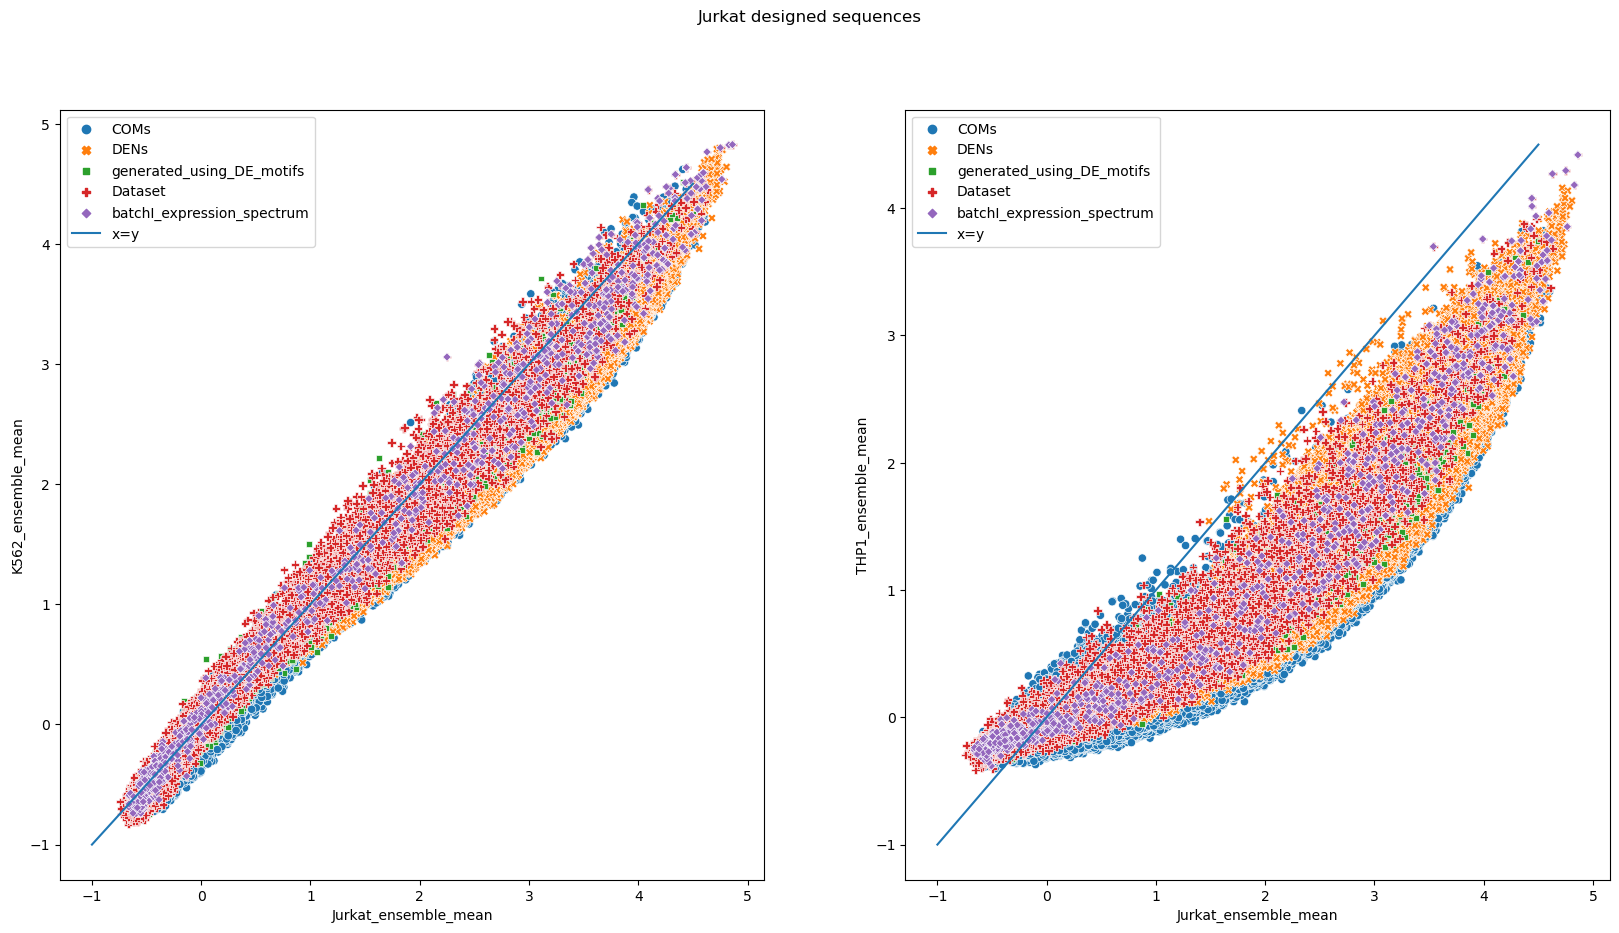

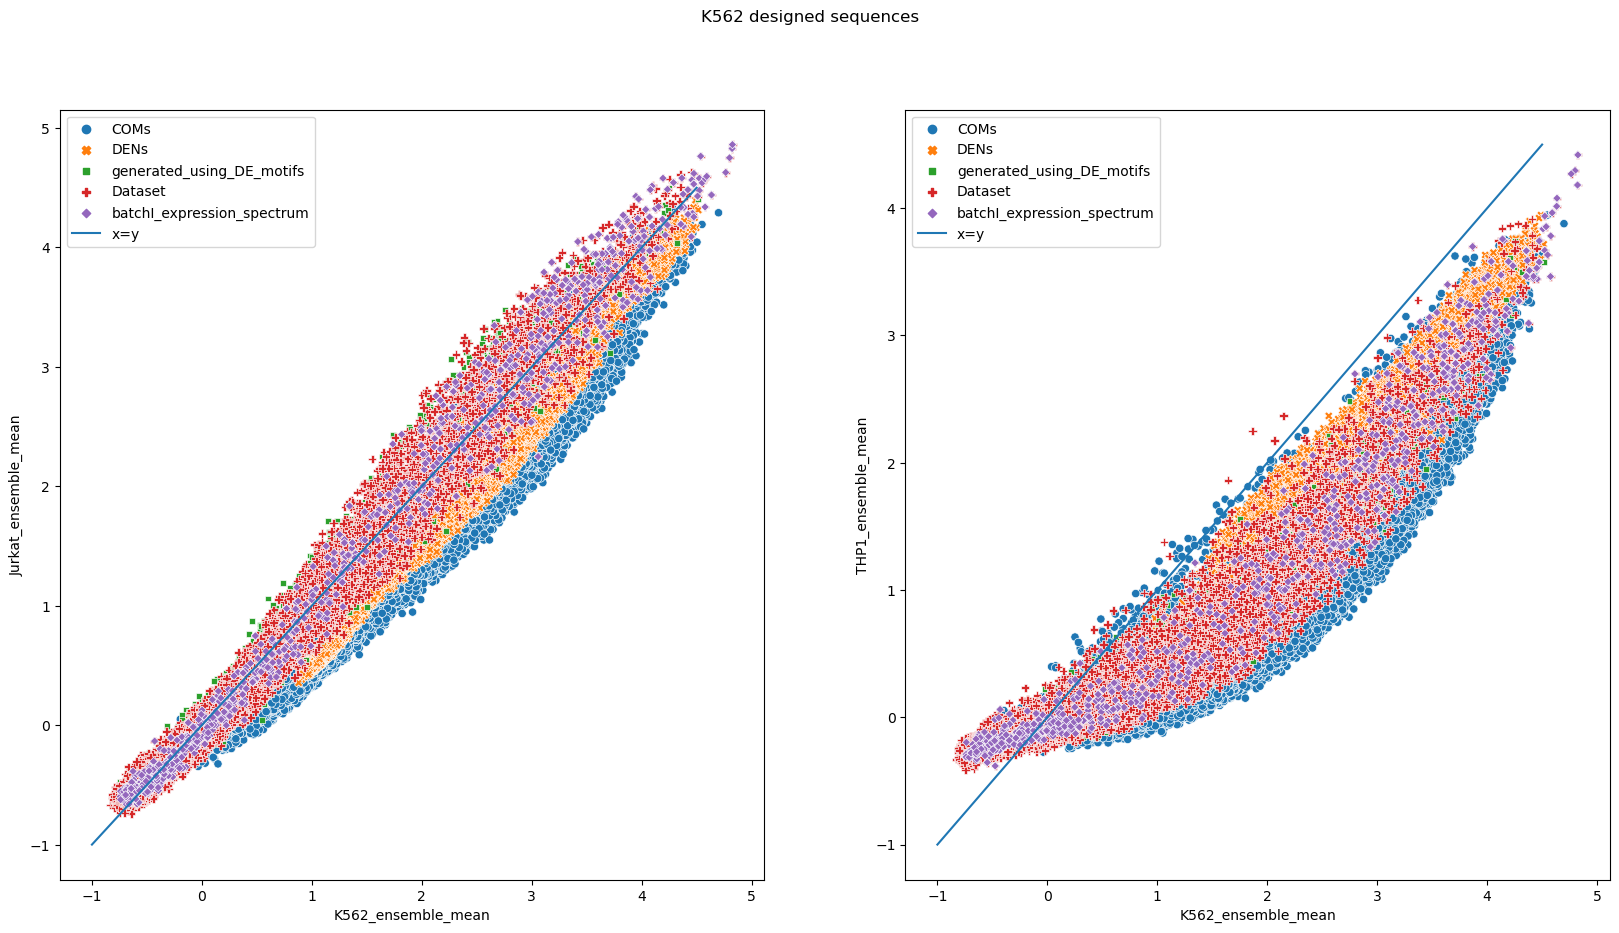

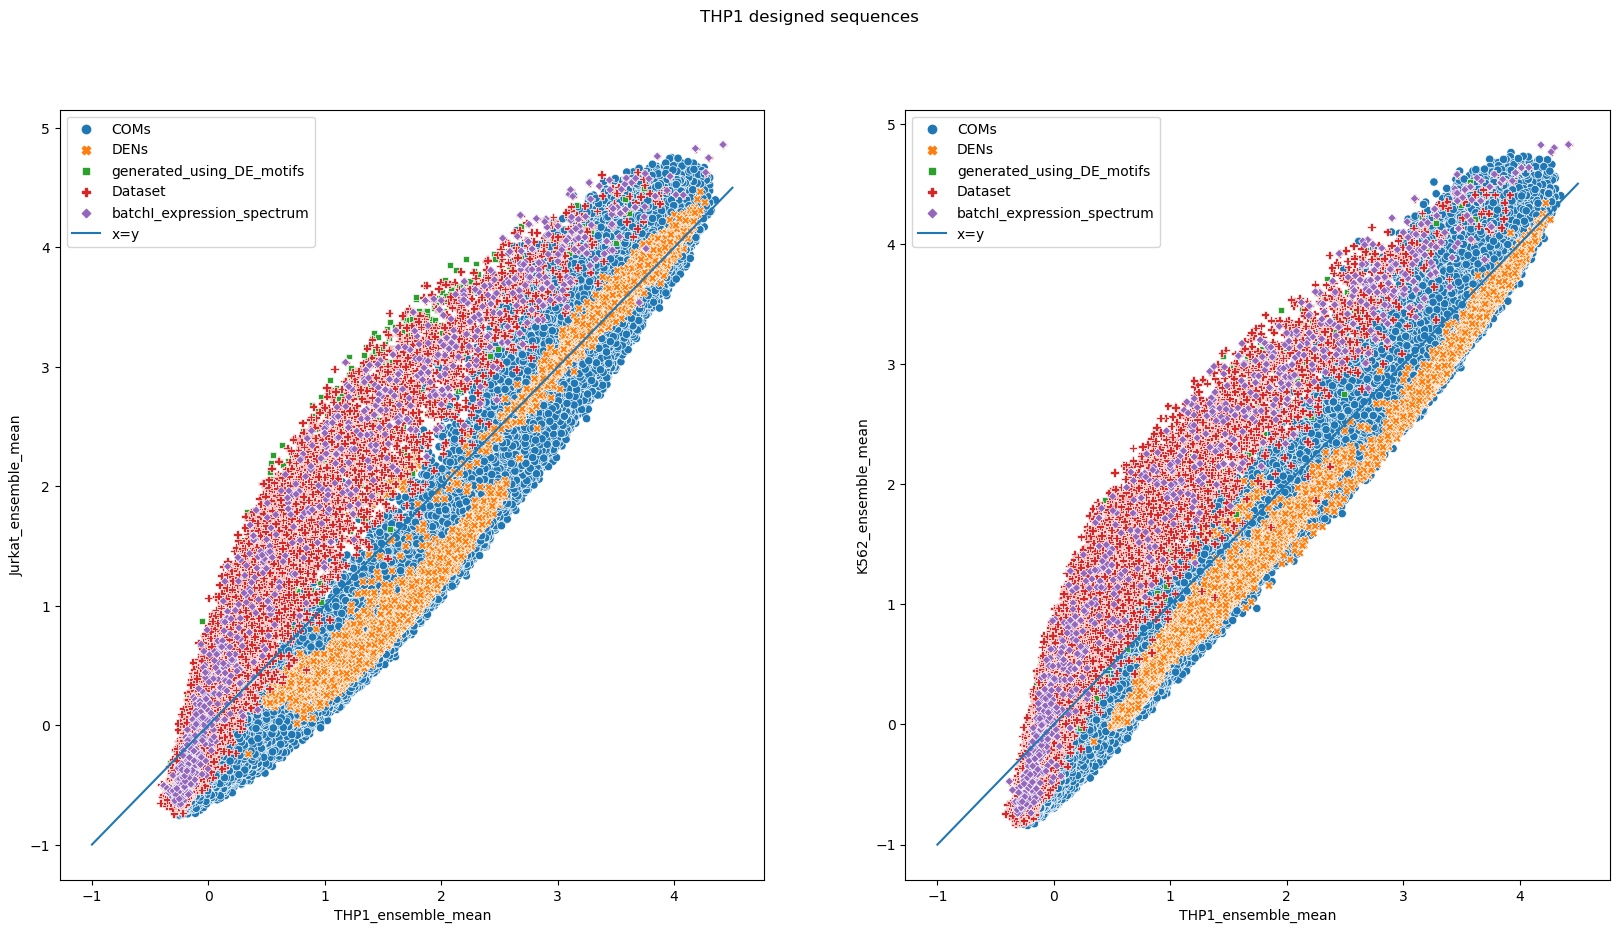

In [12]:
for i, cell1 in enumerate(["Jurkat", "K562", "THP1"]):
    subset_df = final_df[(final_df["designed_for"] == cell1) | (np.array(final_df["designed_for"]) == None)]
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    
    c = 0
    for j, cell2 in enumerate(["Jurkat", "K562", "THP1"]):
        if i == j:
            continue
        
        sns.scatterplot(data=subset_df, 
                        x=f"{cell1}_ensemble_mean", 
                        y=f"{cell2}_ensemble_mean", 
                        hue="design_method", style="design_method",
                        hue_order=["COMs", 
                                   "DENs", 
                                   "generated_using_DE_motifs", 
                                   "Dataset",
                                   "batchI_expression_spectrum"],
                        ax=ax[c])
        ax[c].plot(np.linspace(-1, 4.5), np.linspace(-1, 4.5), label="x=y")
        ax[c].legend()
        c += 1
        
    fig.suptitle(f"{cell1} designed sequences")
    plt.show()